# DAPGEO-02 Well Logs 
## Phase 4: 426 - 499 m

### Curve abbreviations

- GR: Total gamma ray (API)
- K: Potassium content (%)
- TH: Thorium content (ppm)
- U: Uranium content (ppm)
- COND: Electrical conductivity, skin effect compensation (mS/m)
- RES: Electrical resistivity, reciprocal of COND (Ωm)
- DEVIATION_ABI: Inclination (degrees)
- DRIFTAZIMUTH_ABI: Magnetic north deviation (degrees)
- AMPLITUDES_NULL_2D: ABI amplitude (db)
- RADIUS_NULL_2D: ABI radius (mm)
- V_S-WAVE_PS: Processed S-wave velocity PS suspension logging

In [22]:
from sys import stdout
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   

In [23]:
# This function converts null values to NaN
# E.g. null = -9999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-99999.000000):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

#This function smoothes the curves for better visualization
def smooth(data, window_len=10):
    """Smooth the data using a window with requested size."""
    s_p = np.r_[2*data[0]-data[window_len:1:-1],
                data, 2*data[-1]-data[-1:-window_len:-1]]
    w_p = np.ones(window_len, 'd')
    y_p = np.convolve(w_p/w_p.sum(), s_p, mode='same')
    return y_p[window_len-1:-window_len+1]


In [24]:
# Load LAS files from phase 4  (.las version 2)

p4_kut = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_SGR.las'))
p4_vs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_VS_processed.las'))
p4_il = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_IL.las'))

# Load LAS files from phase 4  (.las version 3)
#p4_abi = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_ABI.las'))

In [25]:
p4_il.keys() 

['DEPT',
 'GAMMA',
 'COND',
 'RES',
 'TEMP',
 'AP-COND',
 'TEMP#1',
 'AP-COND#1',
 'TENSION',
 'TIME']

/tmp/ipykernel_3573/3499982744.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


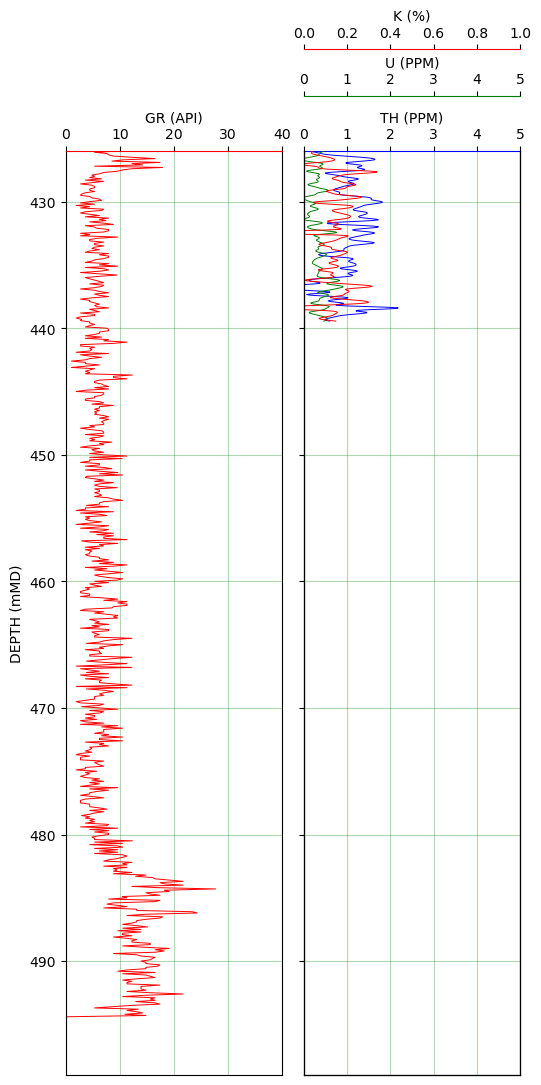

In [26]:
f5, ax1 = plt.subplots(figsize=(12,12))
#Reduce the space between each subplot
f5.subplots_adjust(wspace = 0.1)

curve_names = ['GR (API)', 'TH (PPM)','U (PPM)','K (%)']

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks
ax1.plot(p4_il['GAMMA'], p4_il['DEPT'], color = "red", lw = 0.7)
ax1.set_xlim(0, 40)
ax1.set_ylim(426,499)
ax1.spines['top'].set_edgecolor('red')
ax1.set_ylabel('DEPTH (mMD)')
ax1.invert_yaxis()

ax2.plot(p4_kut['TH_SGR'], p4_kut['DEPT'], color = "blue", lw = 0.7)
ax2.set_xlim(0, 5)
ax2.set_ylim(426,499)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(p4_kut['U_SGR'], p4_kut['DEPT'], color = "green", lw = 0.7)
ax3.set_xlim(0, 5)
ax3.set_ylim(426,499)
ax3.spines['top'].set_edgecolor('green')

ax4.plot(p4_kut['K_SGR'], p4_kut['DEPT'], color = "red", lw = 0.7)
ax4.set_xlim(0, 1)
ax4.set_ylim(426,499)
ax4.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f5.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
plt.savefig('DAPGEO-02_P4_GR_KUTH.png', bbox_inches='tight', dpi=300)


/tmp/ipykernel_3573/2562544091.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


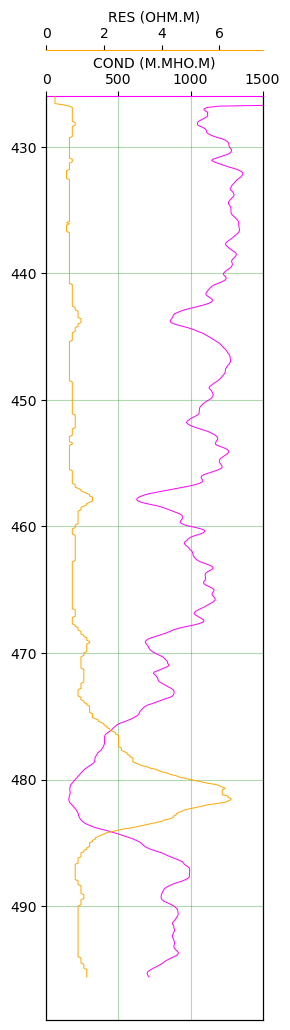

In [27]:
f4, ax1 = plt.subplots(figsize=(12,12))
#Reduce the space between each subplot
f4.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['COND (M.MHO.M)','RES (OHM.M)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

#Set up the individual log tracks
#ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
#ax1.set_xlim(0, 200)
#ax1.spines['top'].set_edgecolor('red')
#ax1.set_ylabel('DEPTH (mMD)')
#ax1.invert_yaxis()

ax2.plot(p4_il['COND'], p4_il['DEPT'], color = "magenta", lw = 0.7)
ax2.set_xlim(0, 1500)
ax1.set_ylim(426,499)
ax2.spines['top'].set_edgecolor('magenta')

ax3.plot(p4_il['RES'], p4_il['DEPT'], color = "orange", lw = 0.7)
ax3.set_xlim(0, 7.5)
ax3.set_ylim(426,499)
ax3.spines['top'].set_edgecolor('orange')


#Set up the common elements between the subplots
for i, ax in enumerate(f4.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
plt.savefig('DAPGEO-02_P4_IL.png', bbox_inches='tight', dpi=300)